In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('googleplaystore.csv')


In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
data.describe()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
# Apps category wise
category = data['Category'].value_counts()


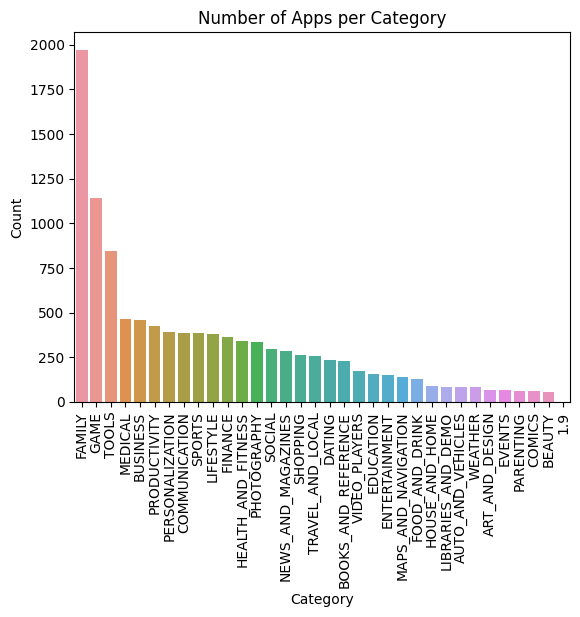

In [8]:

sns.barplot(x=category.index, y=category.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Number of Apps per Category')
plt.xticks(rotation=90)
plt.show()


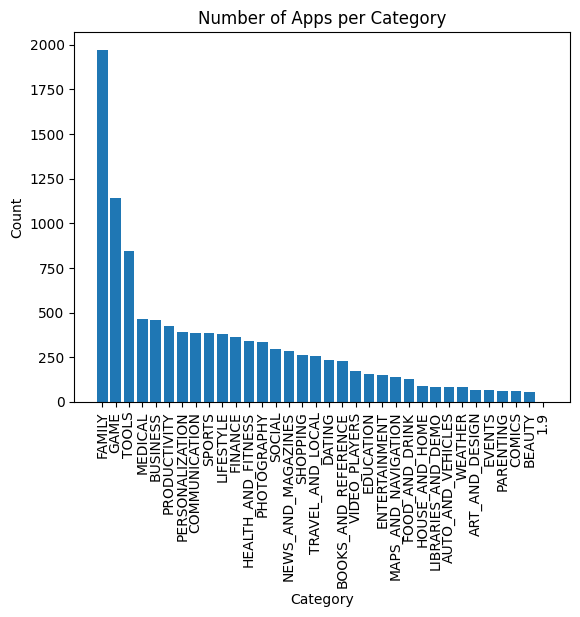

In [7]:
plt.bar(category.index, category.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Number of Apps per Category')
plt.xticks(rotation=90)
plt.show()


In [11]:
import plotly.graph_objects as go

rating = data['Rating'].value_counts()

fig = go.Figure(data=[
    go.Bar(x=rating.index, y=rating.values)
])

fig.update_layout(
    xaxis=dict(title='Rating'),
    yaxis=dict(title='Count'),
    title='Number of Apps per Rating',
    xaxis_tickangle=-90
)

fig.show()


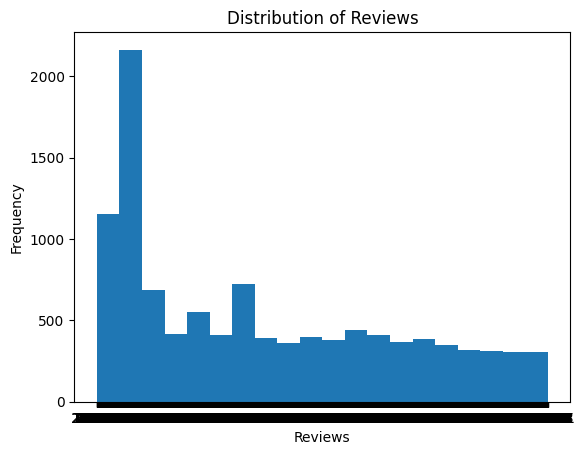

In [12]:
plt.hist(data['Reviews'], bins=20)
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.title('Distribution of Reviews')
plt.show()


In [13]:
print(data['Category'].value_counts())


FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64


In [14]:
import plotly.graph_objects as go
import seaborn as sns

sns.set(style='whitegrid')

fig = go.Figure(data=go.Scatter(
    x=data['Installs'],
    y=data['Rating'],
    mode='markers'
))

fig.update_layout(
    xaxis=dict(title='Number of Installs'),
    yaxis=dict(title='Rating'),
    title='Relation between Installs and Ratings'
)

fig.show()


In [20]:
#Realation between category and ratings
relation =data.groupby('Category')['Rating'].mean().sort_values(ascending=False)
print('High Rates App Categories')
print(relation)


High Rates App Categories
Category
1.9                    19.000000
EVENTS                  4.435556
EDUCATION               4.389032
ART_AND_DESIGN          4.358065
BOOKS_AND_REFERENCE     4.346067
PERSONALIZATION         4.335987
PARENTING               4.300000
GAME                    4.286326
BEAUTY                  4.278571
HEALTH_AND_FITNESS      4.277104
SHOPPING                4.259664
SOCIAL                  4.255598
WEATHER                 4.244000
SPORTS                  4.223511
PRODUCTIVITY            4.211396
HOUSE_AND_HOME          4.197368
FAMILY                  4.192272
PHOTOGRAPHY             4.192114
AUTO_AND_VEHICLES       4.190411
MEDICAL                 4.189143
LIBRARIES_AND_DEMO      4.178462
FOOD_AND_DRINK          4.166972
COMMUNICATION           4.158537
COMICS                  4.155172
NEWS_AND_MAGAZINES      4.132189
FINANCE                 4.131889
ENTERTAINMENT           4.126174
BUSINESS                4.121452
TRAVEL_AND_LOCAL        4.109292
LIFESTYL

In [17]:
data['Rating'].describe()


count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

In [19]:

data['Reviews'].describe()


count     10841
unique     6002
top           0
freq        596
Name: Reviews, dtype: object

In [21]:
category_counts = relation.value_counts()


In [23]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(x=category_counts.index, y=category_counts.values)
])

fig.update_layout(
    xaxis=dict(title='App Category'),
    yaxis=dict(title='Count'),
    title='Distribution of App Categories',
    xaxis_tickangle=-90
)

fig.show()


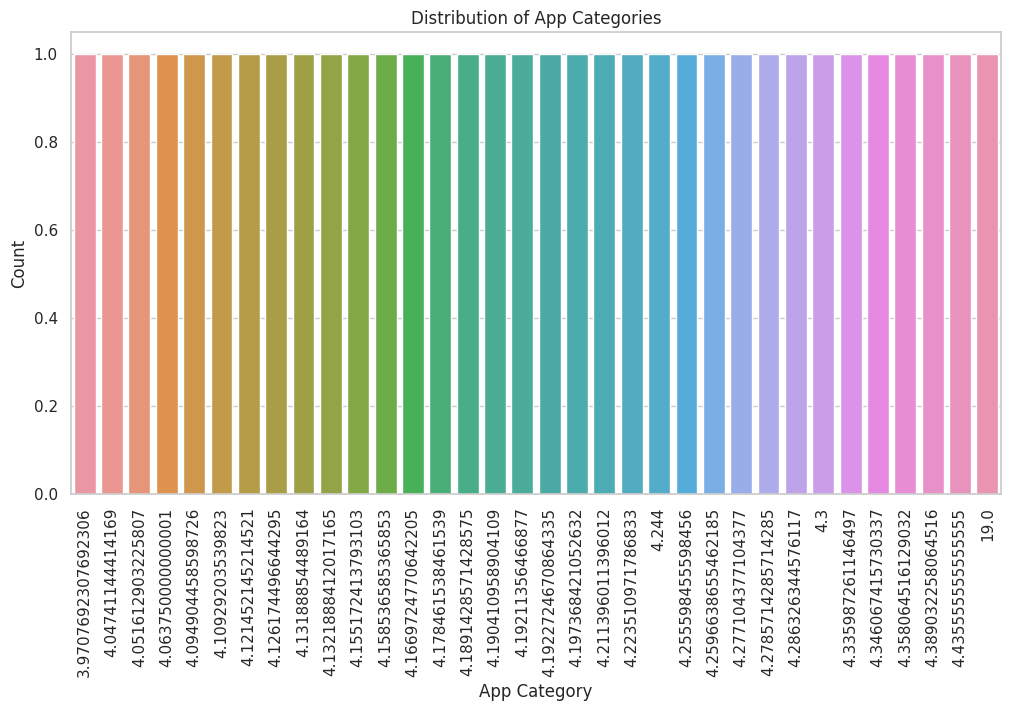

In [26]:


plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xlabel('App Category')
plt.ylabel('Count')
plt.title('Distribution of App Categories')
plt.xticks(rotation=90)
plt.show()


In [24]:
data.dropna()
data.drop_duplicates()
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000
